##پرسش 3

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 16.9MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


#بخش 1

Image to binary function

In [5]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

Noise injection function

In [21]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


#بخش 2

Noise Level: 0.1


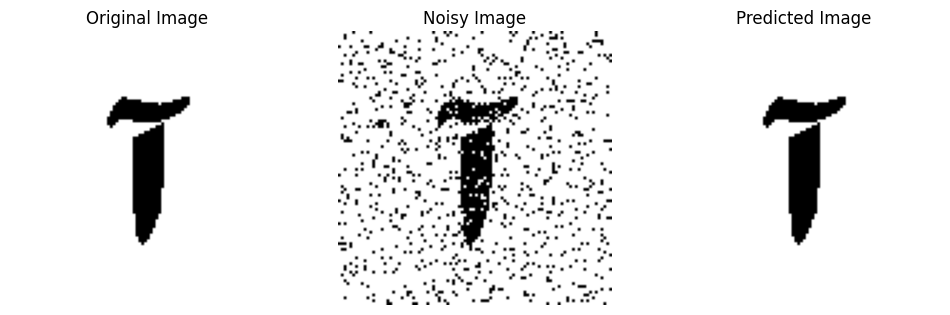

Noise Level: 0.2


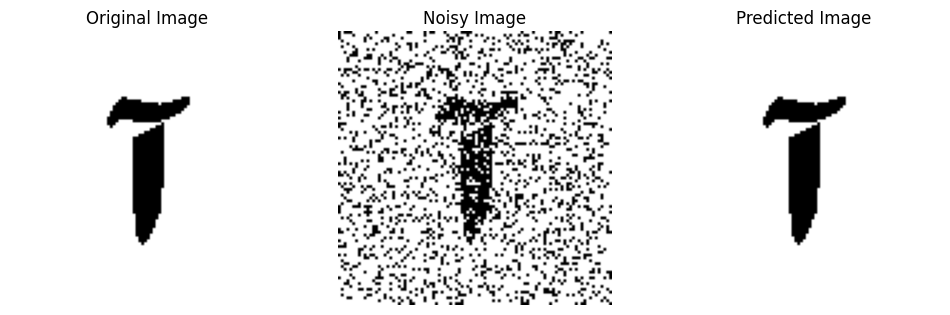

Noise Level: 0.3


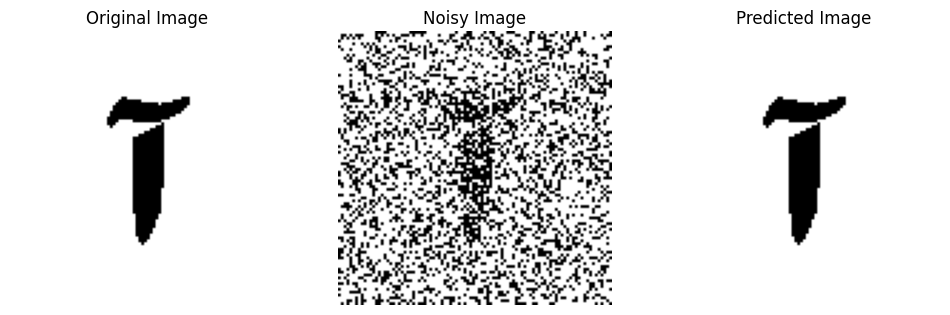

Noise Level: 0.4


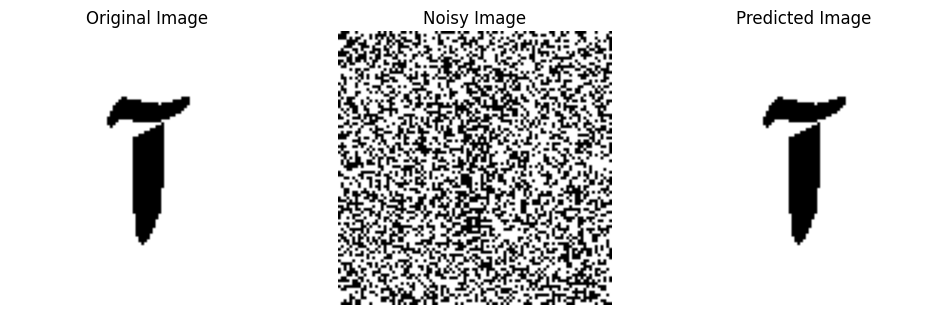

Noise Level: 0.5


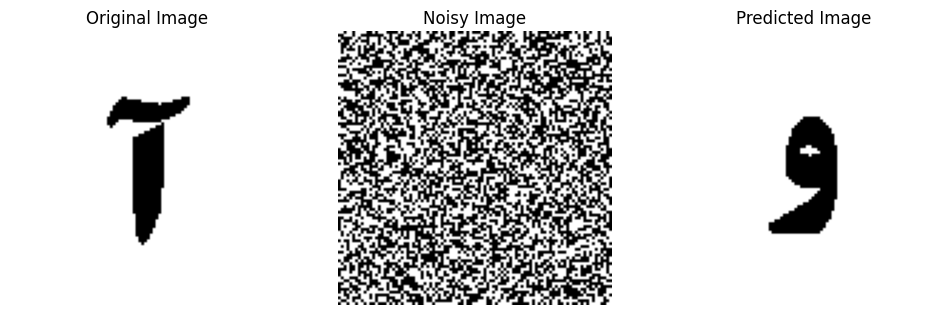

Noise Level: 0.6


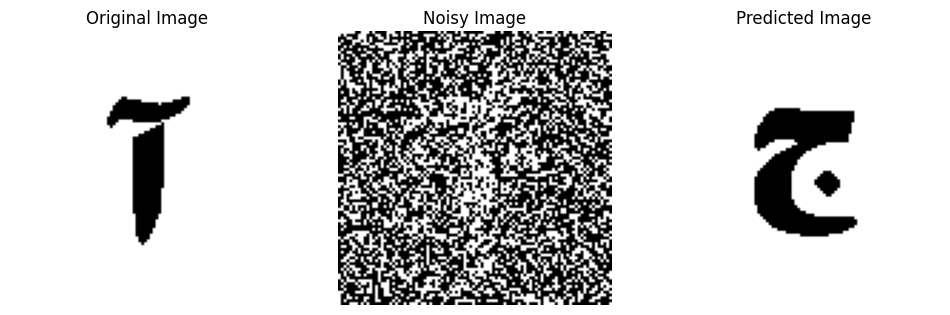

Noise Level: 0.7


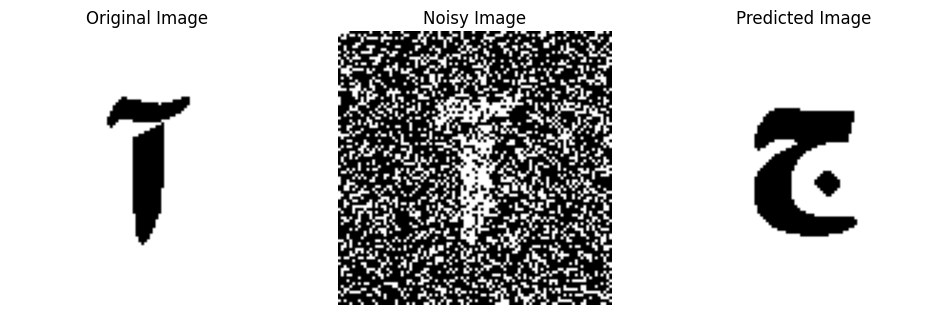

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hamming_distance(image1, image2):
    return np.sum(image1 != image2)

def hamming_neural_network(noisy_image, original_images):
    min_distance = float('inf')  # Initialize minimum distance
    predicted_image = None

    # Compare the noisy image with each original image
    for original in original_images:
        distance = hamming_distance(noisy_image.flatten(), original.flatten())  # Compute Hamming distance
        if distance < min_distance:
            min_distance = distance  # Update minimum distance
            predicted_image = original  # Update predicted image

    return predicted_image

def add_noise(image, noise_level):
    noisy_image = image.copy()
    num_noisy = int(noise_level * image.size)  # Number of pixels to flip
    indices = np.random.choice(image.size, num_noisy, replace=False)  # Randomly choose pixels to flip
    noisy_image.flat[indices] ^= 1  # Flip the selected pixels (0 -> 1, 1 -> 0)
    return noisy_image

def plot_images(original_image, noisy_image, predicted_image):
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    # Noisy image
    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    # Predicted image
    plt.subplot(1, 3, 3)
    plt.title("Predicted Image")
    plt.imshow(predicted_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Load original images
original_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Convert original images to binary (0, 1)
original_images = [np.array(Image.open(path).convert('L')) for path in original_image_paths]  # Convert to grayscale
binary_images = [(img > 128).astype(int) for img in original_images]  # Binarize images

# Test with different noise levels
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for noise_level in noise_levels:
    print(f"Noise Level: {noise_level}")

    # Add noise to the first image
    noisy_image = add_noise(binary_images[0], noise_level)

    # Predict the original image using Hamming Neural Network
    predicted_image = hamming_neural_network(noisy_image, binary_images)

    # Plot the original, noisy, and predicted images
    plot_images(binary_images[0], noisy_image, predicted_image)


# بخش 3

Testing with Missing Fraction: 0.1


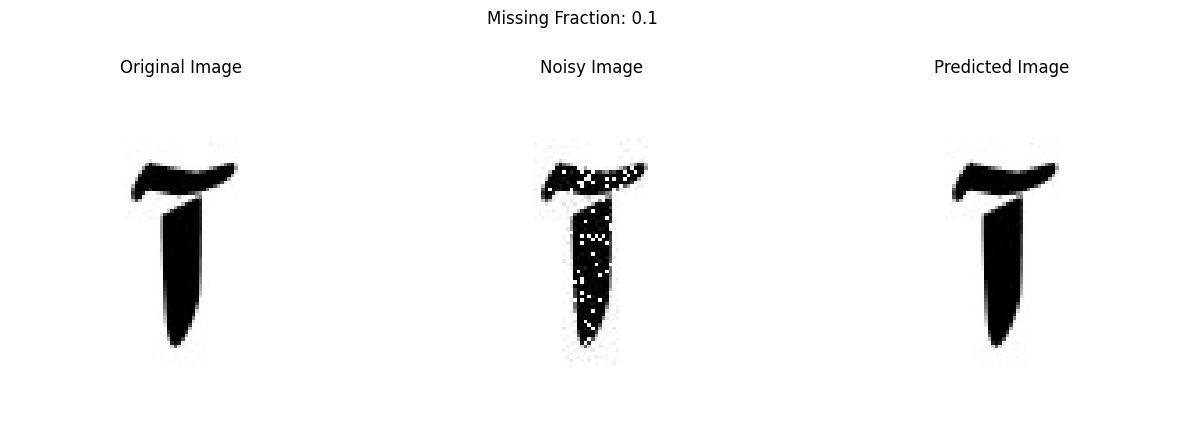

Testing with Missing Fraction: 0.2


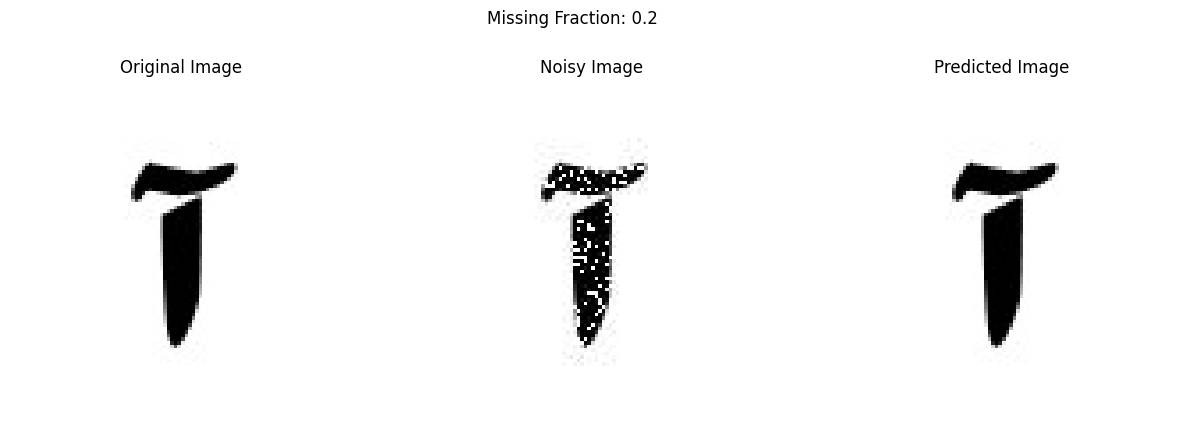

Testing with Missing Fraction: 0.3


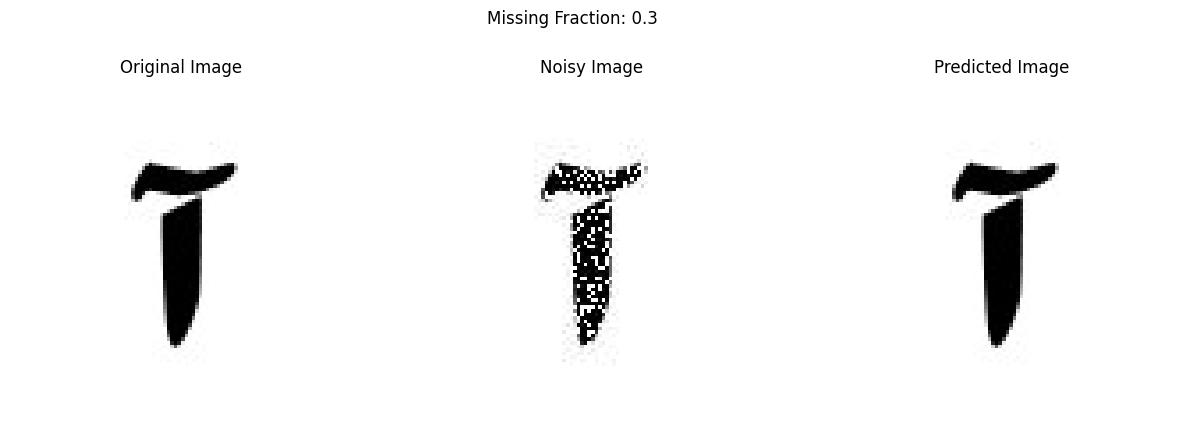

Testing with Missing Fraction: 0.4


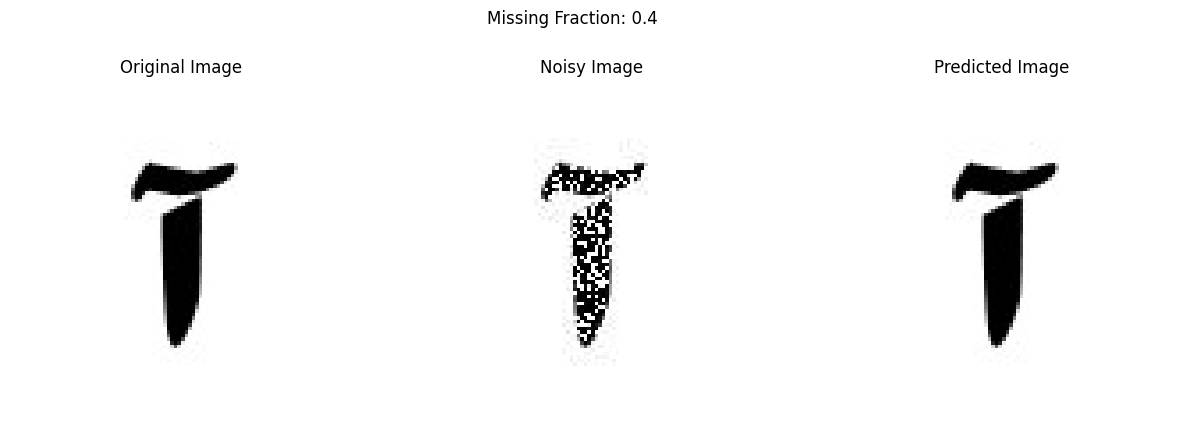

Testing with Missing Fraction: 0.5


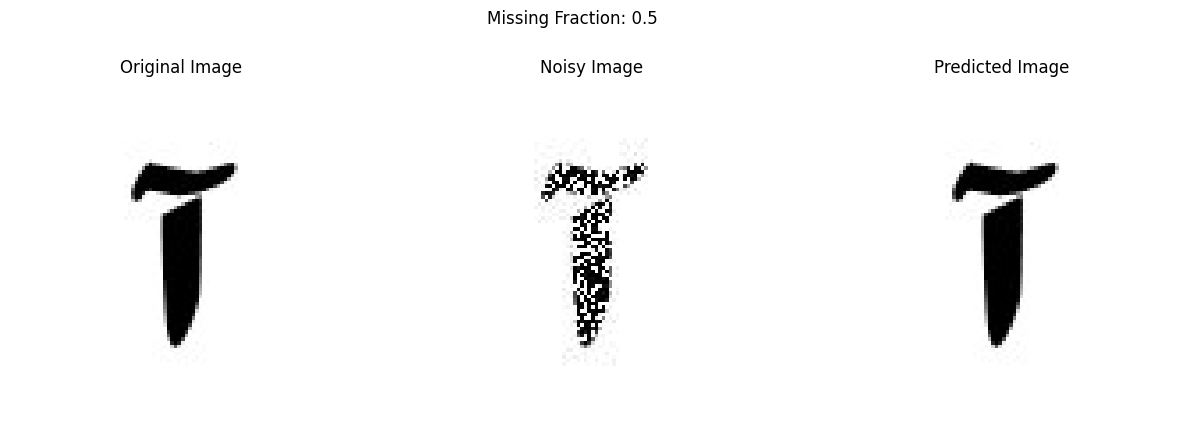

Testing with Missing Fraction: 0.6


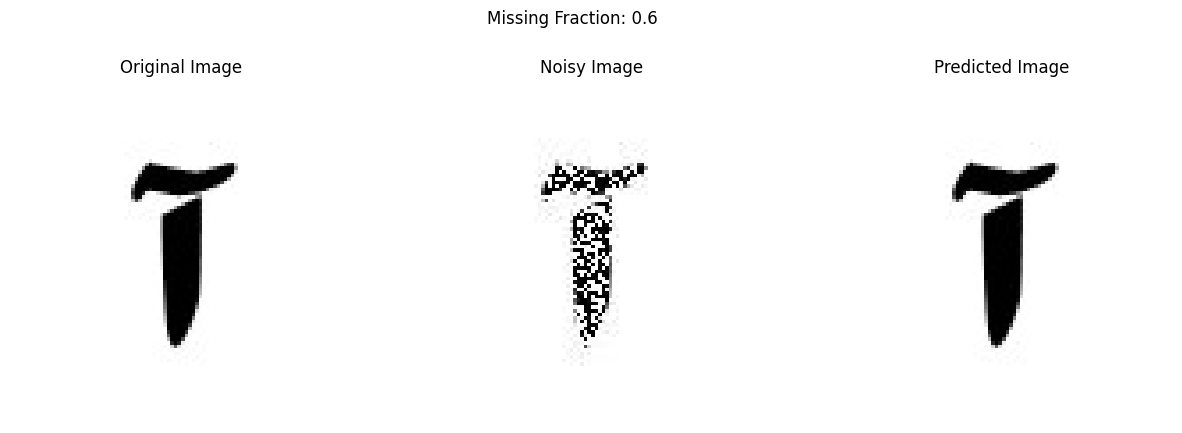

Testing with Missing Fraction: 0.7


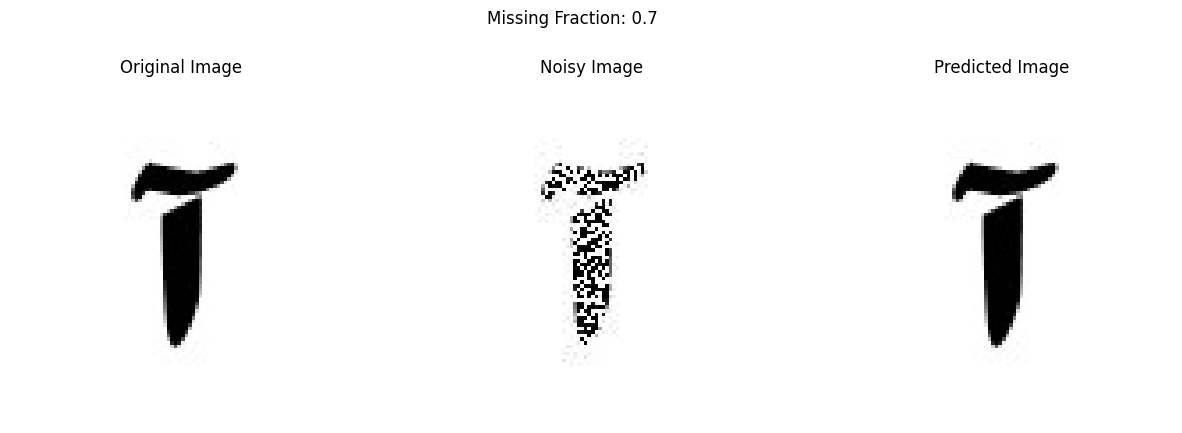

Testing with Missing Fraction: 0.8


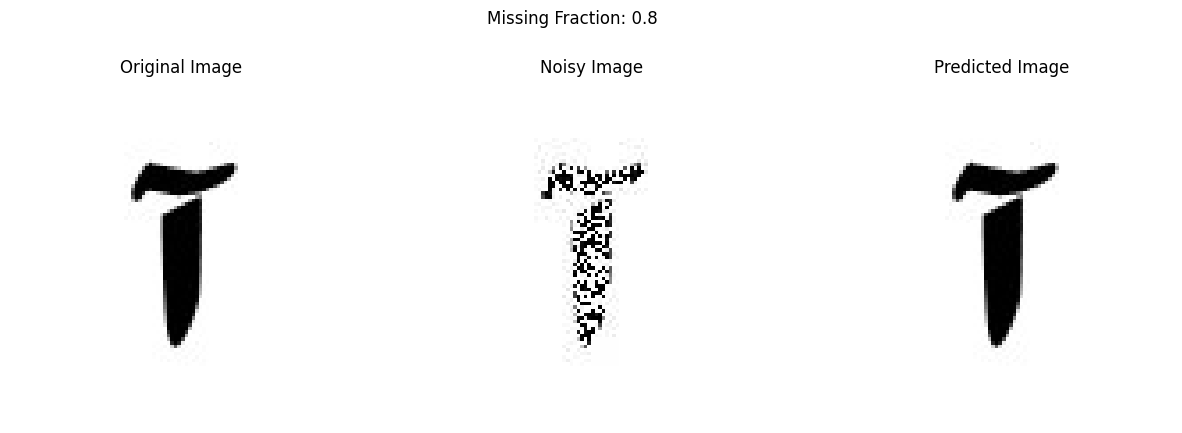

Testing with Missing Fraction: 0.9


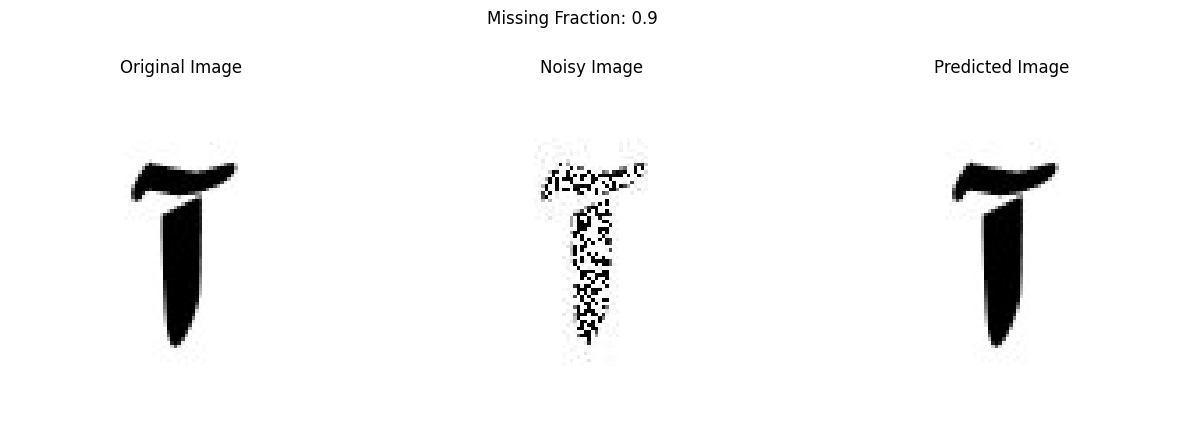

In [35]:
from PIL import ImageDraw
import random

# Function to add missing points to an image
def create_image_with_missing_points(input_path, output_path, missing_fraction=0.1):
    image = Image.open(input_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    width, height = image.size
    total_pixels = int(missing_fraction * width * height)

    for _ in range(total_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        draw.point((x, y), (255, 255, 255))  # Set missing points to white

    image.save(output_path)
    del draw  # Clean up drawing tool

# Plot original, noisy, and predicted images
def plot_images(original_image, noisy_image, predicted_image, title):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Image")
    plt.imshow(predicted_image, cmap="gray")
    plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Step 1: Define file paths for a single original and noisy image
original_image_path = "/content/1.jpg"
noisy_image_path = "/content/noisy1.jpg"

# Step 2: Generate noisy images with different missing fractions for a single image
missing_fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Test with increasing noise levels

# Load the single original image
original_image = np.array(Image.open(original_image_path).convert('L'))
original_images = [original_image]  # Wrap in a list for compatibility with the Hamming network

# Test the Hamming Neural Network with increasing missing fractions
for fraction in missing_fractions:
    print(f"Testing with Missing Fraction: {fraction}")

    # Generate a noisy version of the original image
    create_image_with_missing_points(
        input_path=original_image_path,
        output_path=noisy_image_path,
        missing_fraction=fraction
    )
    noisy_image = np.array(Image.open(noisy_image_path).convert('L'))

    # Predict the original image using the Hamming Neural Network
    predicted_image = hamming_neural_network(noisy_image, original_images)

    # Plot original, noisy, and predicted images
    plot_images(
        original_image=original_image,
        noisy_image=noisy_image,
        predicted_image=predicted_image,
        title=f"Missing Fraction: {fraction}"
    )
